#### Ë©≤Êñá‰ª∂ÂåÖÂê´1,338ÂÄãÊ°à‰æãÔºåÂç≥ÁõÆÂâçÂ∑≤Á∂ìÁôªË®òÈÅéÁöÑ‰øùÈö™Ë®àÂäÉÂèóÁõäËÄÖ„ÄÅÁóÖ‰∫∫ÁâπÈªûÂíåË®àÂäÉË®àÂÖ•ÁöÑÁ∏ΩMedical FeeÁâπÂæµ:

* age:Ë°®Á§∫‰∏ªË¶ÅÂèóÁõäËÄÖÂπ¥ÈΩ°
* sex:ÊÄßÂà•
* bmi:Ë∫´È´îË≥™ÈáèÊåáÊï∏,ÁêÜÊÉ≥BMIÂú®18.5~24.9‰πãÈñì
* children:Ë°®Á§∫‰øùÈö™Ë®àÂäÉ‰∏≠ÊâÄÂåÖÊã¨ÁöÑÂ≠©Â≠ê/ÂèóÊí´È§äËÄÖÁöÑÊï∏Èáè
* smoker:Ë°®Á§∫Ë¢´‰øùÈö™‰∫∫ÊòØÂê¶Á∂ìÂ∏∏Âê∏ÁÖô
* region:ÂèóÁõäËÄÖÂú®ÁæéÂúãÁöÑÂ±Ö‰ΩèÂú∞-Êù±Âåó(northeast), Êù±Âçó(sotheast), Ë•øÂçó(southwest)ÂíåÊù±Âåó(northwest)
* charges:Medical Fee

#### ÁõÆÁöÑ:Ê™¢Ê∏¨ËàáÈÜ´ÁôÇË≤ªÁî®Áõ∏Èóú‰πãËÆäÈáèÔºåÊâæÂá∫Âú®Medical Fee‰∏äÂÖ∑È´òÈ¢®Èö™ÁöÑ‰∫∫

In [1]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1. ËºâÂÖ•Ë≥áÊñô
df = pd.read_csv('insurance.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'insurance.csv'

In [ ]:
df.head()
#df.isnull().sum()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
#Áî® pandas ÁöÑ get_dummies ÂáΩÊï∏ÔºåÊää df Ë£°Èù¢ÁöÑ sex„ÄÅsmoker Âíå region ÈÄô‰∏âÂÄãÈ°ûÂà•ÂûãËÆäÊï∏ (categorical variables)ÔºåËΩâÊèõÊàê one-hot encoding„ÄÇ
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
# ÊääÊâÄÊúâË≥áÊñôÂûãÂà•ËΩâÊàê int ÂûãÊÖã
df_encoded = df_encoded.astype(int)
df_encoded

age  bmi  children  charges  sex_female  sex_male  smoker_no  \
0      19   27         0    16884           1         0          0   
1      18   33         1     1725           0         1          1   
2      28   33         3     4449           0         1          1   
3      33   22         0    21984           0         1          1   
4      32   28         0     3866           0         1          1   
...   ...  ...       ...      ...         ...       ...        ...   
1333   50   30         3    10600           0         1          1   
1334   18   31         0     2205           1         0          1   
1335   18   36         0     1629           1         0          1   
1336   21   25         0     2007           1         0          1   
1337   61   29         0    29141           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0              1                 0                 0                 0   
1              0                 0                 0                 1   
2              0                 0                 0                 1   
3              0                 0                 1                 0   
4              0                 0                 1                 0   
...          ...               ...               ...               ...   
1333           0                 0                 1                 0   
1334           0                 1                 0                 0   
1335           0                 0                 0                 1   
1336           0                 0                 0                 0   
1337           1                 0                 1                 0   

      region_southwest  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1333                 0  
1334                 0  
1335                 0  
1336                 1  
1337                 0  

[1338 rows x 12 columns]

### Ë≥áÊñôÊé¢Á¥¢ÂàÜÊûê (EDA) 

Ë≥áÊñôÈõÜÂü∫Êú¨Ë≥áË®äÔºö
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

ÊèèËø∞ÊÄßÁµ±Ë®àÔºö
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.00000

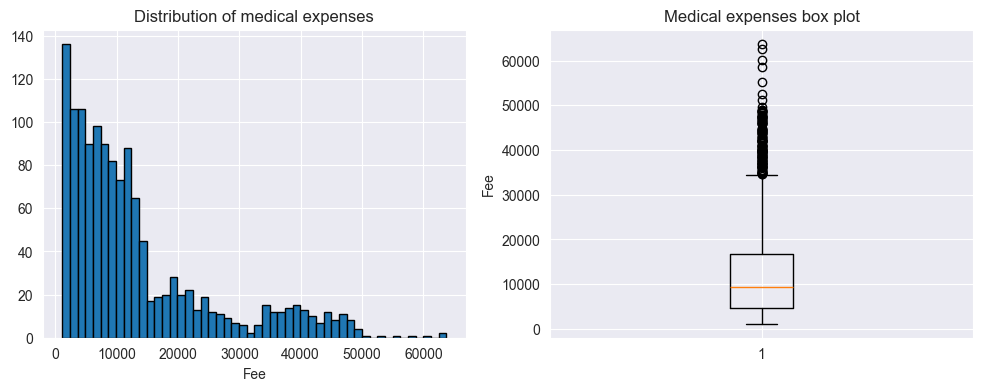

In [ ]:
# Âª∫Ë≠∞Êñ∞Â¢û‰ª•‰∏ãÂàÜÊûê
import matplotlib.pyplot as plt
import seaborn as sns

# Âü∫Êú¨Áµ±Ë®àË≥áË®ä
print("Ë≥áÊñôÈõÜÂü∫Êú¨Ë≥áË®äÔºö")
print(df.info())
print("\nÊèèËø∞ÊÄßÁµ±Ë®àÔºö")
print(df.describe())

# Ê™¢Êü•Áº∫Â§±ÂÄº
print("\nÁº∫Â§±ÂÄºÊ™¢Êü•Ôºö")
print(df.isnull().sum())

# ÁõÆÊ®ôËÆäÊï∏ÂàÜÂ∏É
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['charges'], bins=50, edgecolor='black')
plt.title('Distribution of medical expenses')
plt.xlabel('Fee')

plt.subplot(1, 2, 2)
plt.boxplot(df['charges'])
plt.title('Medical expenses box plot')
plt.ylabel('Fee')
plt.show()


## Ê®ôÊ∫ñÂåñ
* Áï∂Êï∏ÊìöÈõÜ‰∏≠ÁöÑ‰∏çÂêåÁâπÂæµ‰πãÈñìÁöÑÂ∞∫Â∫¶Â∑ÆÁï∞ÂæàÂ§ßÊôÇÔºåÊì¨ÂêàÁöÑÁ∑öÊÄßËø¥Ê≠∏Ê®°ÂûãÂèØËÉΩÊúÉÂèóÂà∞ÂΩ±ÈüøÔºåÂõ†ÁÇ∫ËºÉÂ§ßÁöÑÁâπÂæµÂ∞∫Â∫¶ÂèØËÉΩÊúÉÊîØÈÖçËëóËºÉÂ∞èÁöÑÁâπÂæµÂ∞∫Â∫¶„ÄÇ
* Âú®ÈÄôÁ®ÆÊÉÖÊ≥Å‰∏ãÔºåÊ®ôÊ∫ñÂåñÂèØ‰ª•Âπ´Âä©Á∑öÊÄßËø¥Ê≠∏Ê®°ÂûãÊõ¥Â•ΩÂú∞ÊçïÊçâÁâπÂæµ‰πãÈñìÁöÑÈóú‰øÇÔºåÊèêÈ´òÊ®°ÂûãÁöÑÊ∫ñÁ¢∫ÊÄßÂíåÁ©©ÂÆöÊÄß„ÄÇ
* Â¶ÇÊûúÁâπÂæµ‰πãÈñìÁöÑÂ∞∫Â∫¶Â∑ÆÁï∞ËºÉÂ∞èÔºåÂâáÊ®ôÊ∫ñÂåñÂèØËÉΩ‰∏çÊòØÂøÖË¶ÅÁöÑ„ÄÇÂú®ÈÄôÁ®ÆÊÉÖÊ≥Å‰∏ãÔºåÂèØ‰ª•Áõ¥Êé•‰ΩøÁî®ÂéüÂßãÊï∏ÊìöÈÄ≤Ë°åÁ∑öÊÄßËø¥Ê≠∏Âª∫Ê®°„ÄÇ
* Âú®Êüê‰∫õÊÉÖÊ≥Å‰∏ãÔºåÊ®ôÊ∫ñÂåñÂèØËÉΩÊúÉÂ∞éËá¥ÁâπÂæµ‰πãÈñìÁöÑÁõ∏ÈóúÊÄßËÆäÂº±ÔºåÂõ†Ê≠§ÈúÄË¶ÅÊ†πÊìöÂÖ∑È´îÁöÑÊï∏ÊìöÈõÜÂíåÂïèÈ°å‰æÜÊ±∫ÂÆöÊòØÂê¶ÈúÄË¶ÅÈÄ≤Ë°åÊ®ôÊ∫ñÂåñ„ÄÇ

In [ ]:
from sklearn import preprocessing

# MinMaxScaler = Êï∏ÂÄºÊ≠£Ë¶èÂåñÊñπÊ≥ïÔºåÊääÊï∏ÂÄºÁâπÂæµ (numerical features) Â£ìÁ∏ÆÂà∞ [0, 1] ÁöÑÁØÑÂúç
minmax = preprocessing.MinMaxScaler()

#ÊåáÂÆöË≥áÊñôË°®Ë£°Ë¶ÅÊ≠£Ë¶èÂåñÁöÑÊï∏ÂÄºÂûãÊ¨Ñ‰ΩçÂêçÁ®±ÔºåÊîæÈÄ≤‰∏ÄÂÄã list
numeric_features = ['age', 'bmi', 'children']

#Áî® fit_transform() ‰æÜË®àÁÆóË©≤Ê¨Ñ‰ΩçÁöÑÊúÄÂ§ßÂÄºËàáÊúÄÂ∞èÂÄºÔºàfitÔºâÔºåÁÑ∂Âæå‰æùÁÖßÂÖ¨ÂºèÂÅöÊï∏ÂÄºÊ≠£Ë¶èÂåñÔºàtransform)
#ÊääÊ≠£Ë¶èÂåñÂæåÁöÑÊï∏ÂÄºÁõ¥Êé•Âèñ‰ª£Âéü‰æÜÁöÑË≥áÊñô

df_encoded[numeric_features] = minmax.fit_transform(df_encoded[numeric_features])

# 4. Âª∫Á´ãÊúÄÁµÇÁöÑ DataFrameÔºàÈÄôÂ∞±ÊòØÊÇ®ÁöÑ df_finalÔºâ
df_final = df_encoded.copy()

In [ ]:
df_final

age       bmi  children  charges  sex_female  sex_male  smoker_no  \
0     0.021739  0.315789       0.0    16884           1         0          0   
1     0.000000  0.473684       0.2     1725           0         1          1   
2     0.217391  0.473684       0.6     4449           0         1          1   
3     0.326087  0.184211       0.0    21984           0         1          1   
4     0.304348  0.342105       0.0     3866           0         1          1   
...        ...       ...       ...      ...         ...       ...        ...   
1333  0.695652  0.394737       0.6    10600           0         1          1   
1334  0.000000  0.421053       0.0     2205           1         0          1   
1335  0.000000  0.552632       0.0     1629           1         0          1   
1336  0.065217  0.263158       0.0     2007           1         0          1   
1337  0.934783  0.368421       0.0    29141           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0              1                 0                 0                 0   
1              0                 0                 0                 1   
2              0                 0                 0                 1   
3              0                 0                 1                 0   
4              0                 0                 1                 0   
...          ...               ...               ...               ...   
1333           0                 0                 1                 0   
1334           0                 1                 0                 0   
1335           0                 0                 0                 1   
1336           0                 0                 0                 0   
1337           1                 0                 1                 0   

      region_southwest  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1333                 0  
1334                 0  
1335                 0  
1336                 1  
1337                 0  

[1338 rows x 12 columns]

In [ ]:
# ÁâπÂæµËÆäÊï∏ X ÊáâË©≤ÊòØ df_final ‰∏≠Èô§‰∫Ü 'charges' ‰ª•Â§ñÁöÑÊâÄÊúâÊ¨Ñ‰Ωç
# ‰ΩøÁî® .drop() ÊñπÊ≥ïÊòØÊúÄÂÆâÂÖ®ÊòéÁ¢∫ÁöÑÂÅöÊ≥ï
X = df_final.drop('charges', axis=1).values

# ÁõÆÊ®ôËÆäÊï∏ y ‰øùÊåÅ‰∏çËÆäÔºåÂ∞±ÊòØ 'charges' Ê¨Ñ‰Ωç
# ÁÇ∫‰∫ÜÁµ±‰∏ÄÔºåÂª∫Ë≠∞‰πüÂæû df_final ÂèñÂÄº
y = df_final['charges'].values.reshape(-1, 1)

# ÂàÜÂâ≤Ë®ìÁ∑¥ÂíåÊ∏¨Ë©¶
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [ ]:
print(f"Shape of X_train:{X_train.shape}")
print(f"Shape of X_test:{X_test.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of y_test{y_test.shape}")
# Ê™¢Êü• df_final ÁöÑÊ¨Ñ‰ΩçÁµêÊßã
print("df_final ÁöÑÊ¨Ñ‰ΩçÔºö")
print(df_final.columns.tolist())
print(f"Á∏ΩÂÖ±Êúâ {len(df_final.columns)} ÂÄãÊ¨Ñ‰Ωç")
print(f"X ÁöÑÂΩ¢ÁãÄ: {X.shape}")

# Ê™¢Êü•Ââç11ÂÄãÊ¨Ñ‰ΩçÊòØ‰ªÄÈ∫º
print("\nÂâç11ÂÄãÊ¨Ñ‰ΩçÔºàÊÇ®ÁöÑÁâπÂæµËÆäÊï∏ÔºâÔºö")
for i in range(11):
    if i < len(df_final.columns):
        print(f"{i}: {df_final.columns[i]}")

Shape of X_train:(936, 11)
Shape of X_test:(402, 11)
Shape of y_train:(936, 1)
Shape of y_test(402, 1)
df_final ÁöÑÊ¨Ñ‰ΩçÔºö
['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
Á∏ΩÂÖ±Êúâ 12 ÂÄãÊ¨Ñ‰Ωç
X ÁöÑÂΩ¢ÁãÄ: (1338, 11)

Ââç11ÂÄãÊ¨Ñ‰ΩçÔºàÊÇ®ÁöÑÁâπÂæµËÆäÊï∏ÔºâÔºö
0: age
1: bmi
2: children
3: charges
4: sex_female
5: sex_male
6: smoker_no
7: smoker_yes
8: region_northeast
9: region_northwest
10: region_southeast


##  ‰ΩøÁî® DataFrame ÈÄ≤Ë°å Pairplot

<Figure size 1500x1200 with 0 Axes>

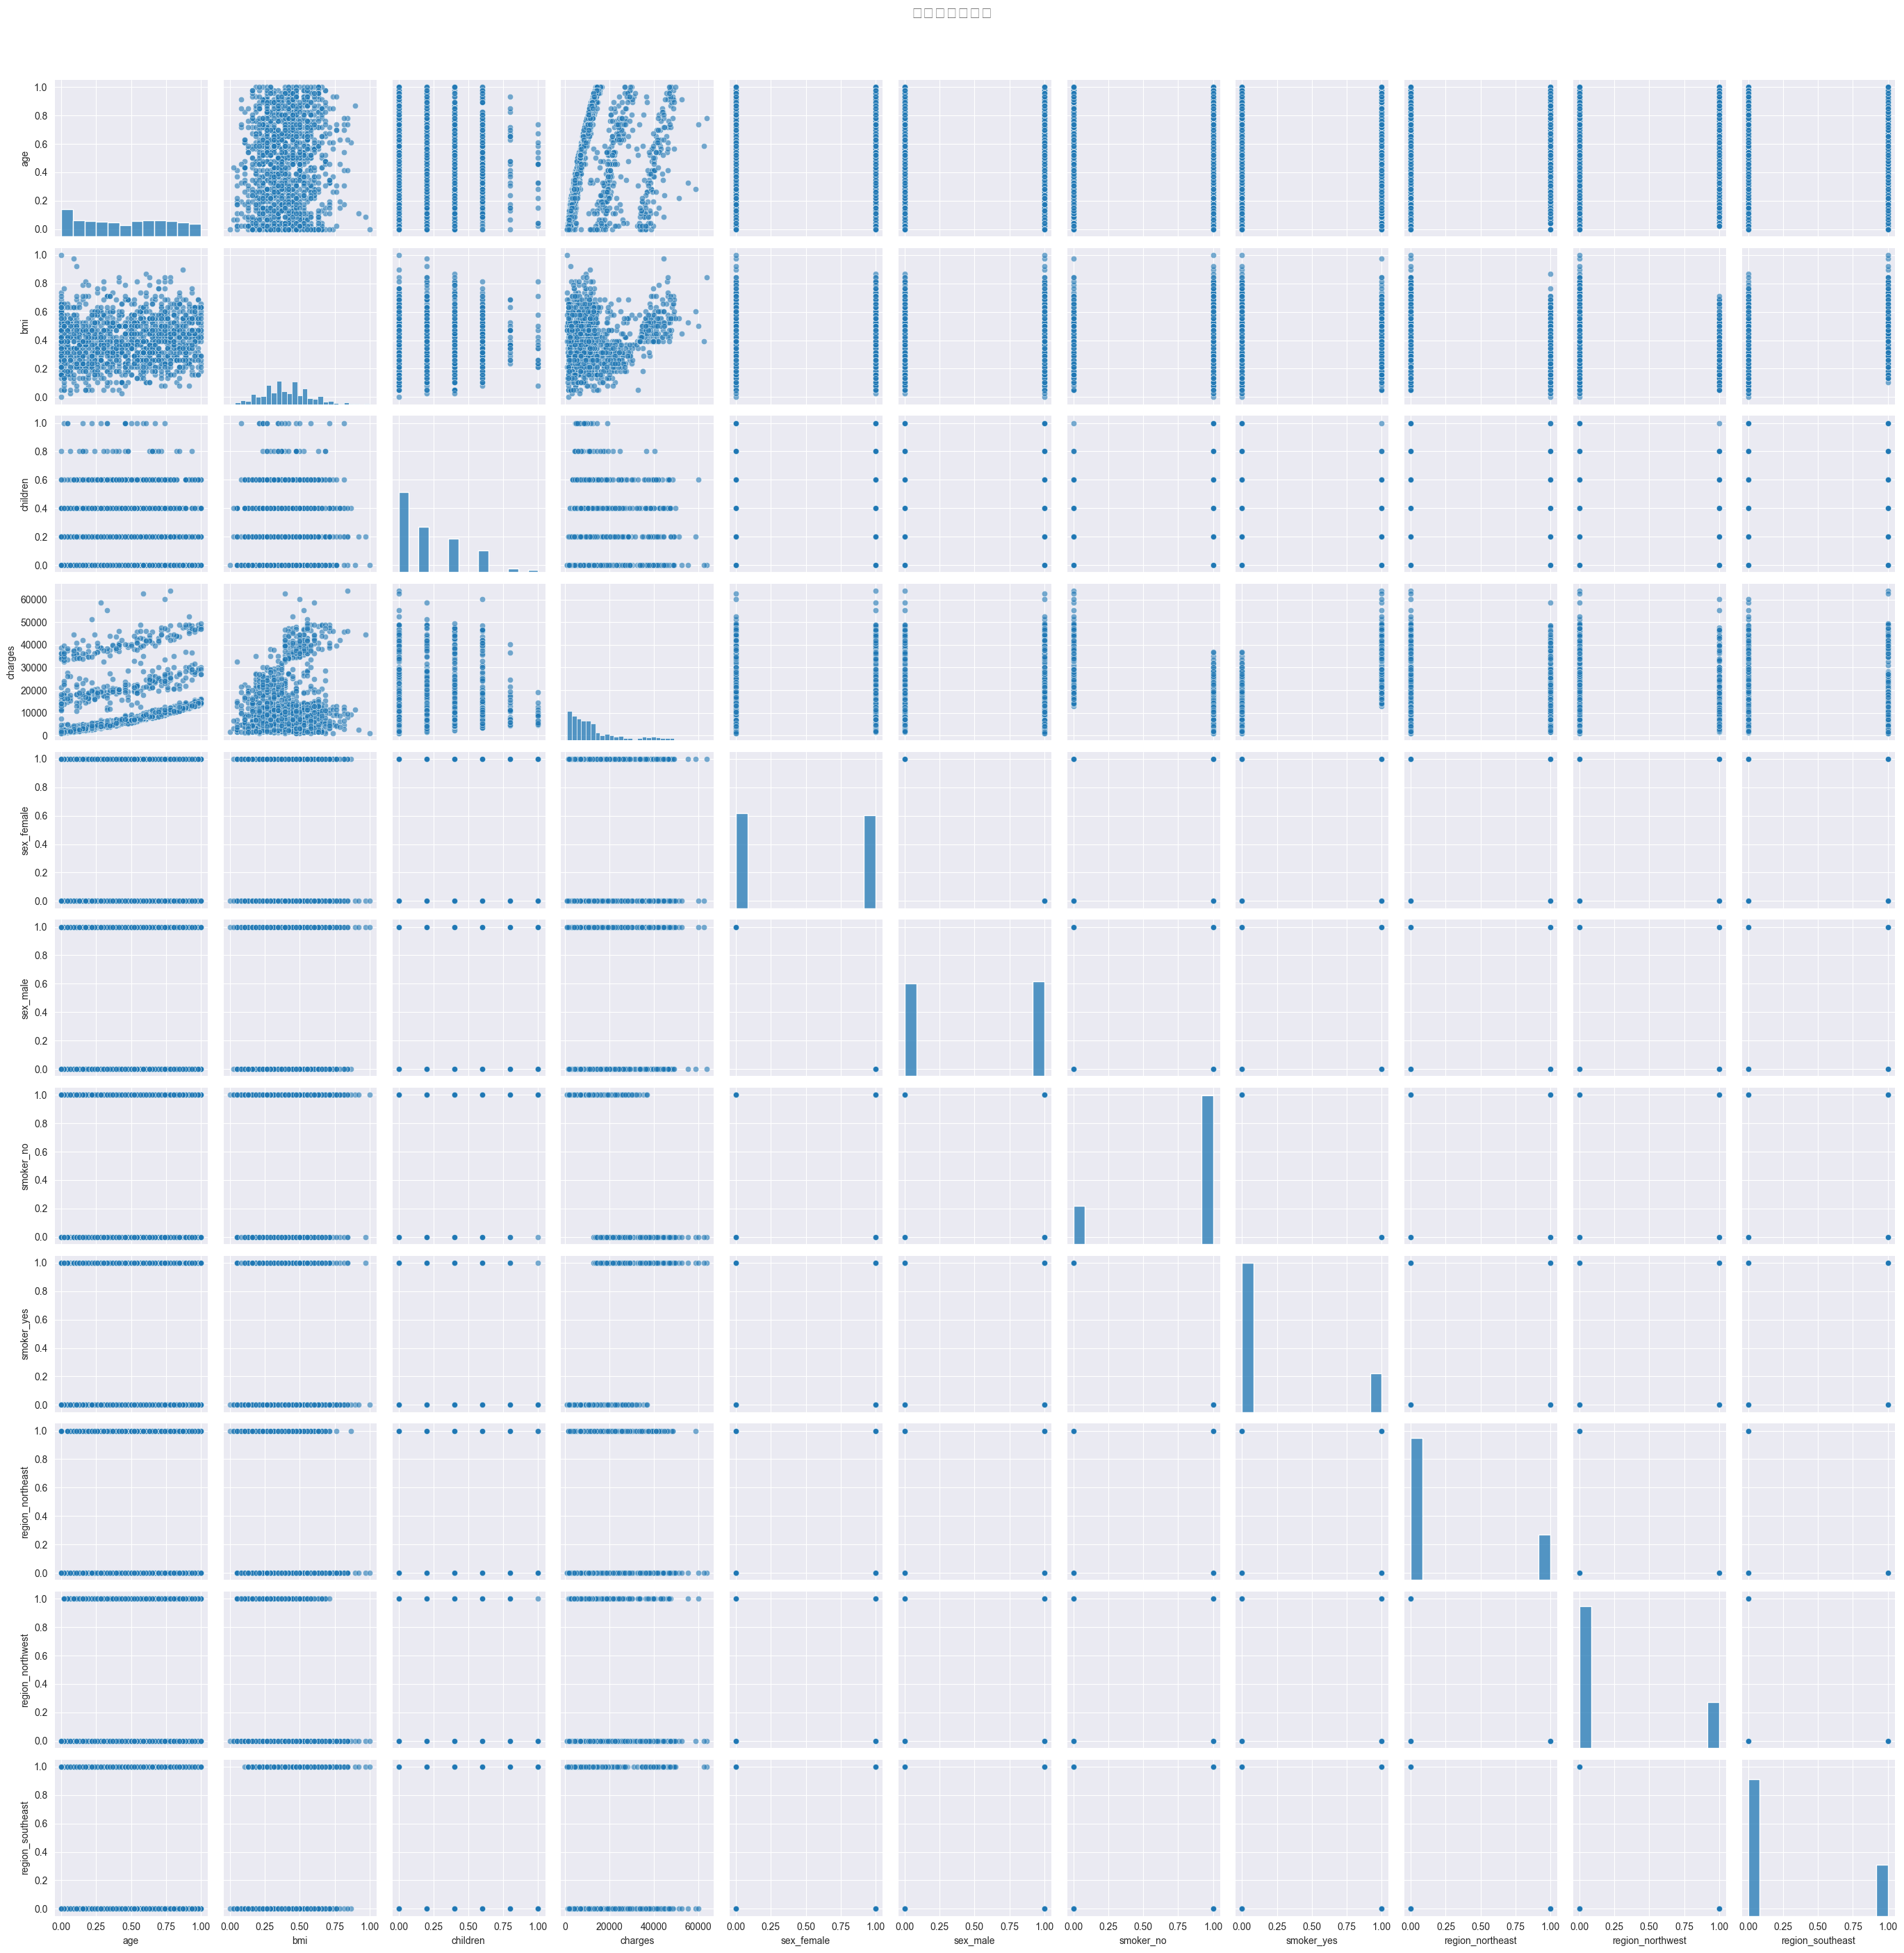

In [ ]:
# Âª∫Á´ãÂåÖÂê´ÁâπÂæµËÆäÊï∏ÁöÑ DataFrame
feature_names = df_final.columns[:11].tolist()  # ÂèñÂâç11ÂÄãÊ¨Ñ‰ΩçÂêçÁ®±
#feature_names = ['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']

#Êää‰πãÂâçÂæû df_final.iloc[:, 0:11].values ÂèñÂá∫‰æÜÁöÑ numpy Èô£Âàó XÔºåÂåÖÊàê‰∏ÄÂÄãÊñ∞ÁöÑ DataFrame
#columns=feature_names üëâ ÊåáÂÆöÈÄôÂÄã DataFrame ÁöÑÊ¨Ñ‰ΩçÂêçÁ®±ÔºåÂ∞±ÊòØ‰∏äÈù¢ÈÇ£ÂÄã feature_names list
X_df = pd.DataFrame(X, columns=feature_names)

# Âü∫Êú¨ pairplot
plt.figure(figsize=(15, 12))
sns.pairplot(X_df, diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('ÁâπÂæµËÆäÊï∏ÈÖçÂ∞çÂúñ', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Correlation
### <span style="color:#3498DB">Point1: Ë´ãËßÄÂØüÂêÑËÆäÊï∏‰πãÈñìÁöÑÈóú‰øÇ</span>
### <span style="color:#3498DB">Point2: Ë´ãÂà§Êñ∑ÂêÑËÆäÊï∏‰πãÈñìÊòØÂê¶ÊúâÂÖ±Á∑öÈóú‰øÇ</span>

# Áõ∏ÈóúÊÄßÂàÜÊûê

ËàáMedical FeeÁõ∏ÈóúÊÄßÊéíÂ∫èÔºö
charges             1.000000
smoker_no           0.787251
smoker_yes          0.787251
age                 0.299009
bmi                 0.196188
region_southeast    0.073981
children            0.067999
sex_female          0.057293
sex_male            0.057293
region_southwest    0.043210
region_northwest    0.039905
region_northeast    0.006350
Name: charges, dtype: float64


<Axes: >

<Figure size 1500x1200 with 0 Axes>

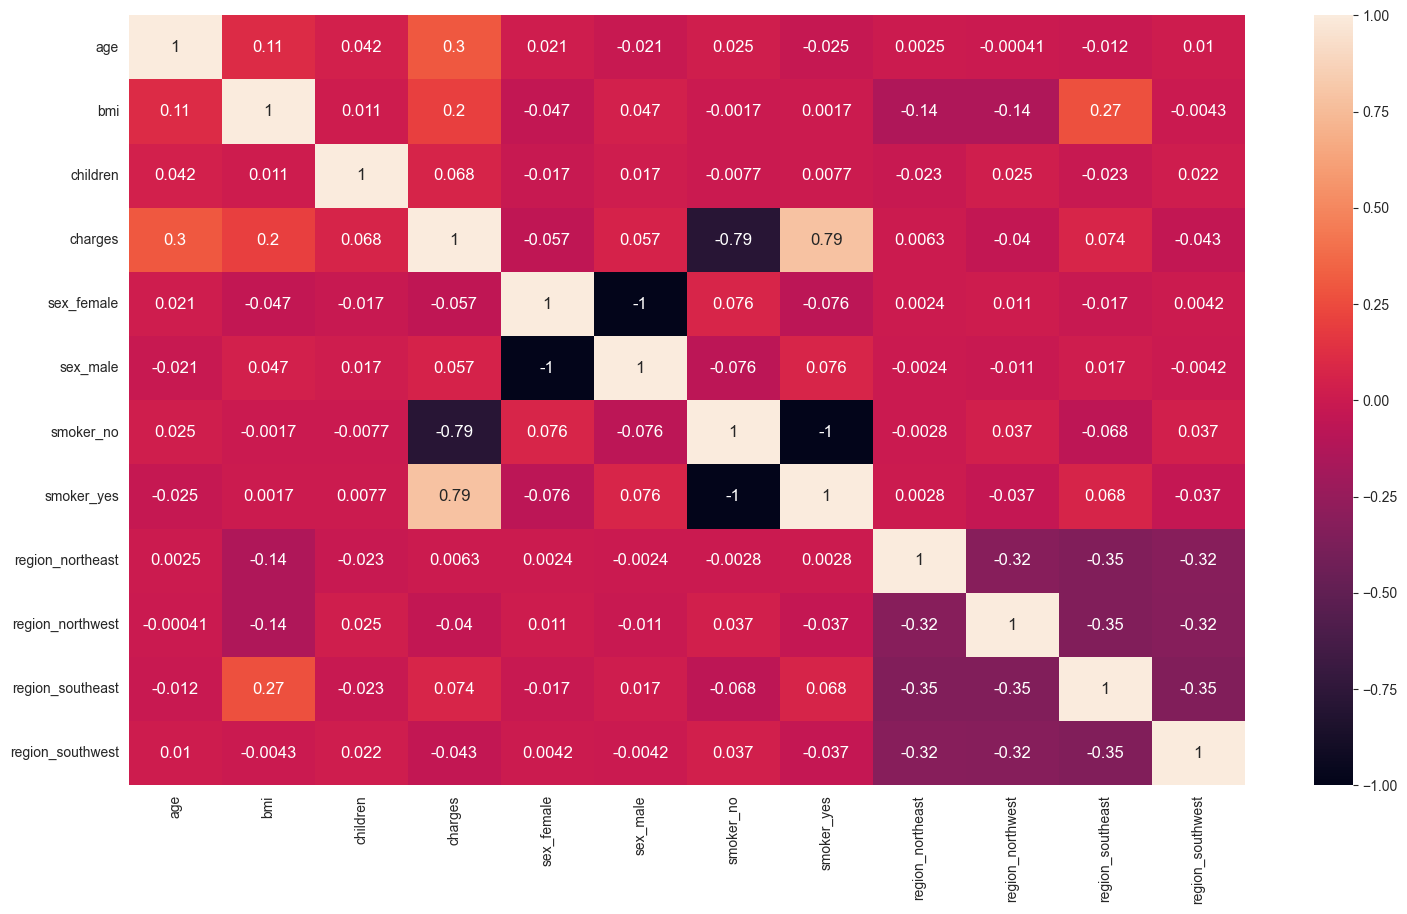

In [ ]:
plt.figure(figsize=(15, 12))
corrmat = df_encoded.corr()
target_corr = corrmat['charges'].abs().sort_values(ascending=False)
print("ËàáMedical FeeÁõ∏ÈóúÊÄßÊéíÂ∫èÔºö")
print(target_corr)
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

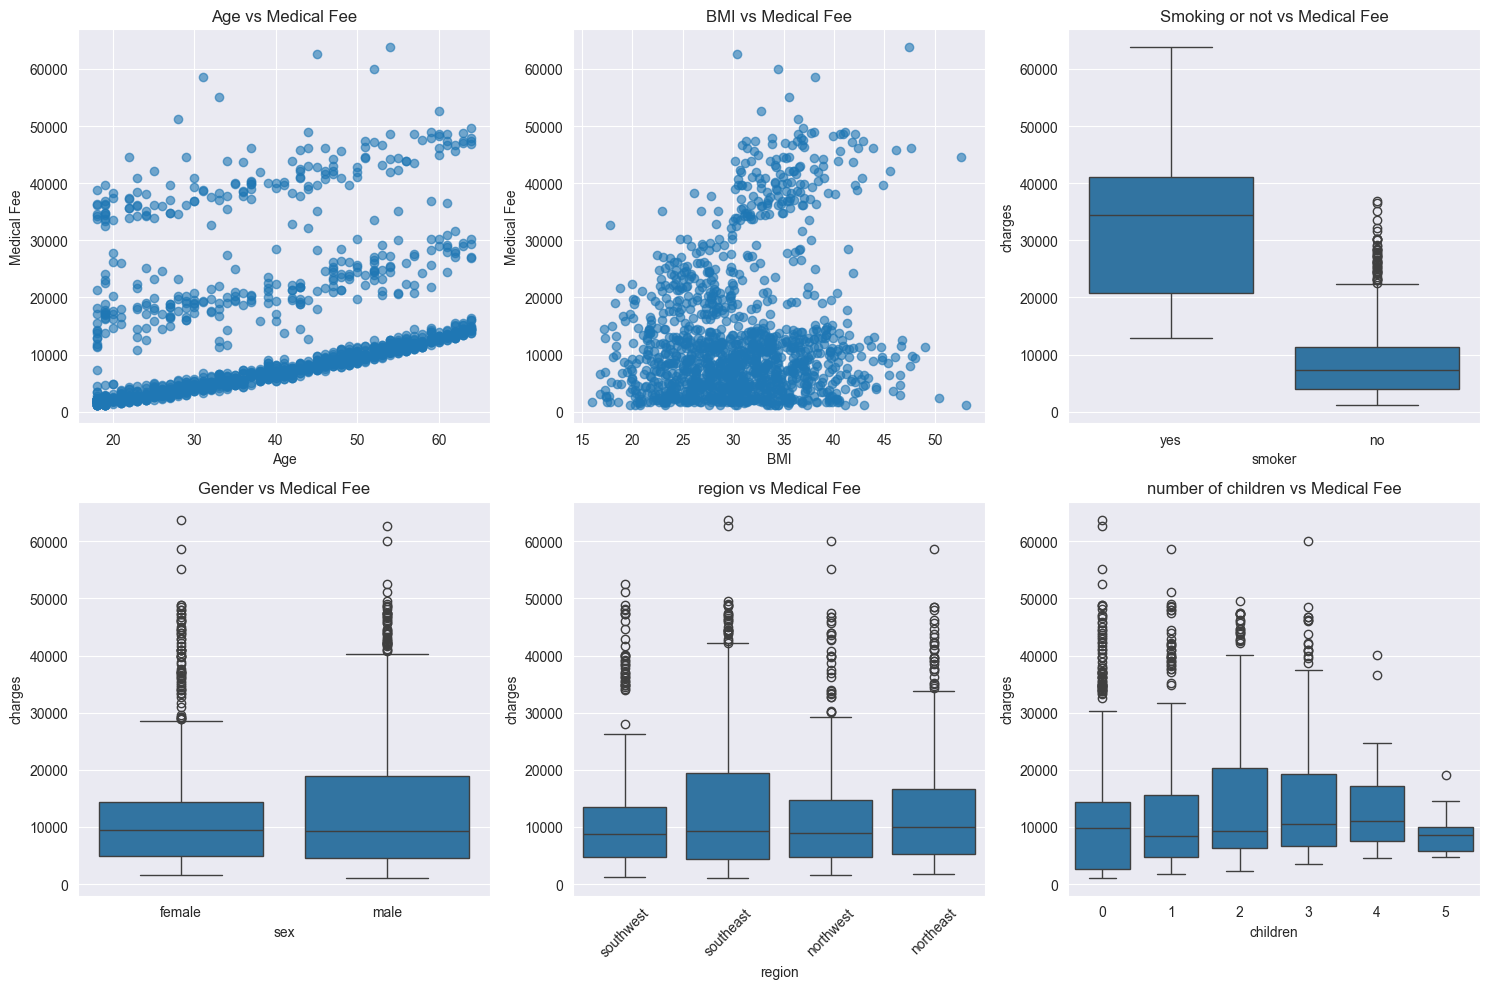

In [ ]:
# ÂàÜÊûêÂêÑÁâπÂæµÂ∞çÈÜ´ÁôÇË≤ªÁî®ÁöÑÂΩ±Èüø
plt.figure(figsize=(15, 10))

# Âπ¥ÈΩ° vs Ë≤ªÁî®
plt.subplot(2, 3, 1)
plt.scatter(df['age'], df['charges'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Medical Fee')
plt.title('Age vs Medical Fee')

# BMI vs Ë≤ªÁî®
plt.subplot(2, 3, 2)
plt.scatter(df['bmi'], df['charges'], alpha=0.6)
plt.xlabel('BMI')
plt.ylabel('Medical Fee')
plt.title('BMI vs Medical Fee')

# Âê∏ÁÖô vs Ë≤ªÁî®
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Smoking or not vs Medical Fee')

# ÊÄßÂà• vs Ë≤ªÁî®
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Gender vs Medical Fee')

# Âú∞ÂçÄ vs Ë≤ªÁî®
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='region', y='charges')
plt.title('region vs Medical Fee')
plt.xticks(rotation=45)

# Â≠êÂ•≥Êï∏Èáè vs Ë≤ªÁî®
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='children', y='charges')
plt.title('number of children vs Medical Fee')

plt.tight_layout()
plt.show()


In [ ]:
## 5-1 Linear Regression (PPT 1.1 & 1.2)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

# R2 scoreÔºåÂç≥Ê±∫ÂÆö‰øÇÊï∏ÔºåÂèçÊò†YÁöÑÂÖ®ÈÉ®ËÆäÁï∞ËÉΩÈÄöÈÅéËø¥Ê≠∏Èóú‰øÇË¢´ÊâÄÊúâXËß£ÈáãÁöÑÊØî‰æã„ÄÇ
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# RMSE‰∏ÄËà¨ÊåáÂùáÊñπÊ†πË™§Â∑Æ(Ê®ôÊ∫ñË™§Â∑Æ)ÔºåÂèØË°°ÈáèÈ†êÊ∏¨ÂÄºÂíåÂØ¶ÈöõÂÄº‰πãÈñìÁöÑÂπ≥ÂùáÂ∑ÆÁï∞ÔºåËóâÊ≠§‰º∞Ë®àÈ†êÊ∏¨Ê®°ÂûãÈ†êÊ∏¨ÁõÆÊ®ôÂÄºÁöÑÊ∫ñÁ¢∫Â∫¶
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_linear_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.9999999994608879
R2_score (test):  0.9999999994590105
RMSE:  0.2801655062700165
RMSE:  0.2836183931345437
